
 Kinetic Energy



 Potential Energy



 Equation 1


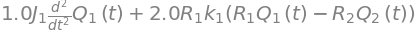


 Equation 2


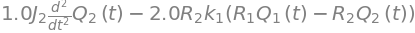

In [1]:
import numpy as np
import sympy as sy
from sympy.physics.mechanics import dynamicsymbols as ds
from sympy import print_latex, init_printing
from IPython import display

init_printing(use_latex=True)

gravity = sy.symbols('g')

class Component:
    def __init__(self, name):
        self.name = name

    def potential(self):
        return None

    def kinetic(self):
        return None

class Point(Component):
    def __init__(self, location: list = [0, 0]):
        self.name = 'point'
        self.location = location

    def get_global_location(self):
        return self.location

class PointMass(Component):
    def __init__(self, parent, mass):
        self.name = 'mass'
        self.parent = parent
        self.mass = mass

    def kinetic(self):
        return 0.5 * self.mass * sy.diff((self.parent.get_global_location()[0]), sy.symbols('t'), 1) ** 2

    def potential(self):
        if self.parent.name in ('connector'):
            return self.mass * gravity * self.parent.get_global_location()[1]
        else:
            return None #self.parent.potential()

    def get_global_location(self):
        return self.parent.get_global_location()

class RigidConnector(Component):
    def __init__(self, parent, length, theta):
        self.name = 'connector'
        self.parent = parent
        self.length = length
        self.theta = theta

        self.start = self.parent.get_global_location()

    def get_global_location(self):
        return [self.start[0] + self.length * self.theta, self.start[1] + self.length * ((self.theta**2)/2)]

class Spring(Component):
    def __init__(self, parent, k, length, x = None, theta = None, parent2 = None):
        self.name = 'spring'
        self.parent = parent
        self.parent2 = parent2
        self.length = length
        self.k = k

        self.theta = theta
        self.x = x

        self.start = self.parent.get_global_location()
        
        if self.parent2:
            self.start2 = self.parent2.get_global_location()

    def kinetic(self):
        return None

    def potential(self):
        return 0.5 * self.k * self.get_global_location()[1] ** 2

    def get_global_location(self):
        if self.theta is None and self.x is None:
            return [self.start[0] - self.start2[0], self.start[0] - self.start2[0]]
        else:
            return [self.x, -self.start[0] + self.x]

class Drum(Component):
    def __init__(self, parent, J, radius, theta):
        self.name = 'drum'
        self.parent = parent
        self.J = J
        self.radius = radius
        self.theta = theta

        self.start = self.parent.get_global_location()

    def kinetic(self):
        return 0.5 * self.J * sy.diff(self.theta, sy.symbols('t'), 1) ** 2

    def get_global_location(self):
        return [self.start[0] + self.radius * self.theta, self.start[1] + self.radius * self.theta]


## Some Examples of Scenes ##

## Guide to creating and solving scenes ##
# 1. Define the generalised coordinates. TODO: Auto-define coordinates based on scenes.
# 2. All scenes are based on the Points class. Define the required point/s to generate the scene (exact coordinates of the
# points can be specified but it is unimportant for an energy solution).
# 3. Create the attached component, the parent object is specified in the 1st parameter of the class call.
# Note: if a spring has two parents it has adds no DOF to the system.
# 4. Attach all the required components
# 5. Create a list of all the components (order does not matter).
# 6. Create a list of the generalised coordinates (order does not matter).
# 7. Run the cell.

#-----------------------------------------------------------------------------#

## Double Pendulum ##

# Q_1 = ds('Q_1')
# Q_2 = ds('Q_2')

# point = Point()
# connector_1 = RigidConnector(point, length = sy.symbols('L_1'), theta = Q_1)
# mass_1 = PointMass(connector_1, mass = sy.symbols('m_1'))
# connector_2 = RigidConnector(mass_1, length = sy.symbols('L_2'), theta = Q_2)
# mass_2 = PointMass(connector_2, mass = sy.symbols('m_2'))

# scene = [point, connector_1, mass_1, connector_2, mass_2]
# coords = [Q_1, Q_2]

#-----------------------------------------------------------------------------#

## Double mass springs ##

# x_1 = ds('x_1')
# x_2 = ds('x_2')

# point = Point()
# spring_1 = Spring(point, k = sy.symbols('k_1'), length = sy.symbols('L_1'), x = x_1)
# mass_1 = PointMass(spring_1, mass = sy.symbols('m_1'))
# spring_2 = Spring(mass_1, k = sy.symbols('k_2'), length = sy.symbols('L_2'), x = x_2)
# mass_2 = PointMass(spring_2, mass = sy.symbols('m_2'))

# scene = [point, spring_1, mass_1, spring_2, mass_2]
# coords = [x_1, x_2]

#-----------------------------------------------------------------------------#

## Double Pendulum with spring separating ##

# Q_1 = ds('Q_1')
# Q_2 = ds('Q_2')

# point_1 = Point()
# connector_1 = RigidConnector(point_1, length = sy.symbols('L_1'), theta = Q_1)
# mass_1 = PointMass(connector_1, mass = sy.symbols('m_1'))

# point_2 = Point()
# connector_2 = RigidConnector(point_2, length = sy.symbols('L_2'), theta = Q_2)
# mass_2 = PointMass(connector_2, mass = sy.symbols('m_2'))

# spring = Spring(parent = mass_1, parent2 = mass_2, k = sy.symbols('k_2'), length = sy.symbols('L_2'))

# scene = [point_1, point_2, spring, mass_1, connector_1, connector_2, mass_2]
# coords = [Q_1, Q_2]

#-----------------------------------------------------------------------------#

## Spring loaded mass with pendulum ##

# x = ds('x')
# Q = ds('Q')

# point = Point()
# spring = Spring(point, k = sy.symbols('k_1'), length = sy.symbols('L_1'), x = x)
# mass_1 = PointMass(spring, mass = sy.symbols('m_1'))
# connector = RigidConnector(mass_1, length = sy.symbols('L_1'), theta = Q)
# mass_2 = PointMass(connector, mass = sy.symbols('m_2'))

# scene = [point, spring, mass_1, connector, mass_2]
# coords = [x, Q]

#-----------------------------------------------------------------------------#

## Inverted Pendulums with triple spring ##

# Q_1 = ds('Q_1')
# Q_2 = ds('Q_2')

# point_1 = Point()
# connector_1 = RigidConnector(point_1, length = sy.symbols('L_1'), theta = Q_1)
# mass_1 = PointMass(connector_1, mass = sy.symbols('m_1'))

# point_2 = Point()
# connector_2 = RigidConnector(point_2, length = sy.symbols('L_2'), theta = Q_2)
# mass_2 = PointMass(connector_2, mass = sy.symbols('m_2'))

# spring_1 = Spring(parent = mass_1, parent2 = mass_2, k = sy.symbols('k_1'), length = sy.symbols('L_2'))

# point_3 = Point()
# spring_2 = Spring(parent = mass_1, parent2 = point_3, k = sy.symbols('k_2'), length = sy.symbols('L_2'))

# point_4 = Point()
# spring_3 = Spring(parent = mass_2, parent2 = point_4, k = sy.symbols('k_3'), length = sy.symbols('L_2'))

# scene = [point_1, point_2, point_3, point_4, spring_1, spring_2, spring_3, mass_1, connector_1, connector_2, mass_2]
# coords = [Q_1, Q_2]

#-----------------------------------------------------------------------------#

## Drum with springed mass ##

# Q = ds('Q')
# x = ds('x')

# point_1 = Point()
# drum = Drum(point_1, J = sy.symbols('J'), radius = sy.symbols('R'), theta = Q)

# point_2 = Point()
# spring_1 = Spring(parent = point_2, parent2 = drum, k = sy.symbols('k_1'), length = sy.symbols('L_2'))

# spring_2 = Spring(parent = drum, k = sy.symbols('k_2'), length = sy.symbols('L_2'), x = x)
# mass = PointMass(spring_2, sy.symbols('m'))

# scene = [point_1, point_2, spring_1, spring_2, mass, drum]
# coords = [Q, x]

#-----------------------------------------------------------------------------#

## Double Drum connected by elastic belt ##

Q_1 = ds('Q_1')
Q_2 = ds('Q_2')

point_1 = Point()
drum_1 = Drum(point_1, J = sy.symbols('J_1'), radius = sy.symbols('R_1'), theta = Q_1)

point_2 = Point()
drum_2 = Drum(point_2, J = sy.symbols('J_2'), radius = sy.symbols('R_2'), theta = Q_2)

spring_1 = Spring(parent = drum_1, parent2 = drum_2, k = sy.symbols('k_1'), length = sy.symbols('L_2'))
spring_2 = Spring(parent = drum_1, parent2 = drum_2, k = sy.symbols('k_1'), length = sy.symbols('L_2'))

scene = [point_1, point_2, spring_1, spring_2, drum_1, drum_2]
coords = [Q_1, Q_2]

#-----------------------------------------------------------------------------#

class Simulate:
    def __init__(self, scene: list, coords):
        self.scene = scene
        self.coords = coords

        self.T = self.assemble_T()
        self.V = self.assemble_V()

        print('\n Kinetic Energy')
        display.display(self.T)
        print('\n Potential Energy')
        display.display(self.V)

        self.eqs = self.motion()

        print('\n Equation 1')
        display.display(self.eqs[0])
        print('\n Equation 2')
        display.display(self.eqs[1])

    def assemble_T(self):
        T = 0 
        for i in self.scene:
            if i.kinetic() != None:
                T += i.kinetic()
        return T

    def assemble_V(self):
        V = 0
        for i in self.scene:
            if i.potential() != None:
                V += i.potential()
        return V

    def motion(self):
        eqs = []
        for i in coords:
            dq = sy.diff((i), sy.symbols('t'), 1)
            dTdq = sy.diff((self.T), dq, 1)
            L = sy.diff((dTdq), sy.symbols('t'), 1) + sy.diff((self.V), i, 1)
            eqs.append(L)
        return eqs

sim = Simulate(scene, coords)